In [2]:
import os
import sys
os.chdir("/Users/luisa/Desktop/nygc/cluster/projects/fl4tsf/bin")
sys.path.append(os.getcwd()) 
import torch

from flower.task import Net, train
import torch
# import dataloader
from torch.utils.data import DataLoader
from lib.dataset_utils import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
from lib.physionet import PhysioNet, variable_time_collate_fn, get_data_min_max
from sklearn import model_selection
from torch.utils.data import DataLoader
from lib import utils
from lib.dataset_utils import store_dataset_physionet
import matplotlib.pyplot as plt
from lib.plot import plot_trajectories

path_prefix = "/Users/luisa/Desktop/nygc/cluster/projects/fl4tsf/data"
prefix = "physionet"
batch_size = 64
classif = False
noise_weight = 0.1
max_t_extrap = 5
n_total_tp = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
amp_start = 1.0
amp_end = 1.0 
freq_start =1.0
freq_end = freq_start
epochs = 5
batch_size = 3
sample_tp = 0.9
n_samples = 4
max_t_extrap = 50
lr_val = 0.01
cut_tp = None
extrap = None

from types import SimpleNamespace
args = SimpleNamespace()
args.sample_tp = 0
args.cut_tp = None
args.extrap = None


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


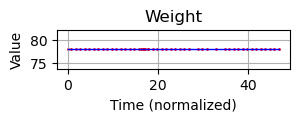

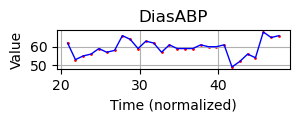

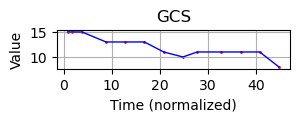

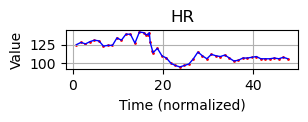

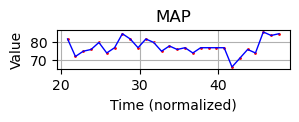

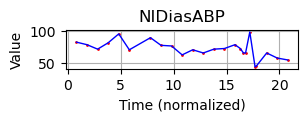

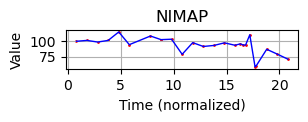

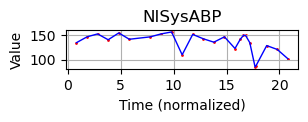

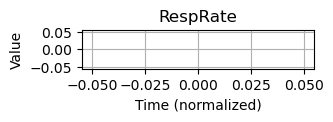

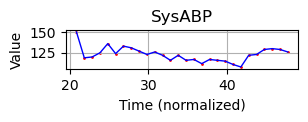

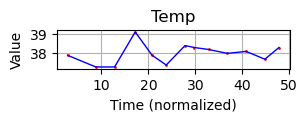

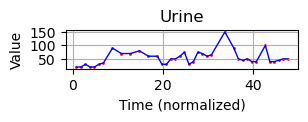

In [128]:

element = c0[3]
time_steps = element[1]
data = element[2]
mask = element[3]
attribute_filtered_idx_features = len(attr_names_filtered)
features =  attribute_filtered_idx_features
for i in range(features):
    feature_name = attr_names[i]
    plt.figure(figsize=(3, 0.5))
    # make a scatter plot
    plt.scatter(time_steps[mask[:, i] == 1], data[mask[:, i] == 1, i], color='red', s=1, label='Observed')
    # make a line plot for the whole time series but not plottting the zeros 
    plot_data = data[:, i][mask[:, i] == 1]
    plt.plot(time_steps[mask[:, i] == 1], plot_data, color='blue', linewidth=1, label='Full time series')
    plt.xlabel('Time (normalized)')
    plt.ylabel('Value')
    plt.title(f'{feature_name}')
    plt.grid()
    plt.show()

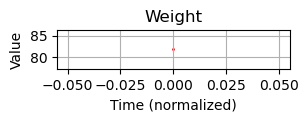

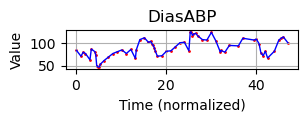

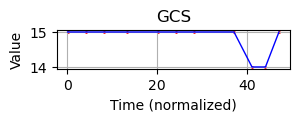

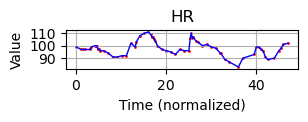

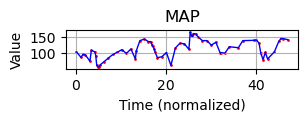

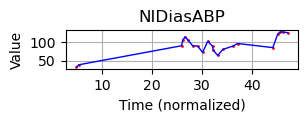

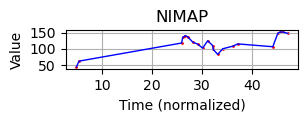

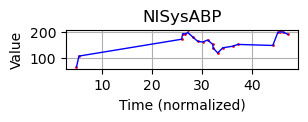

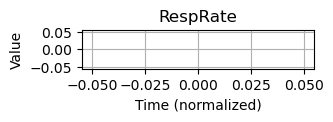

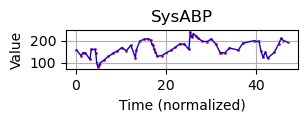

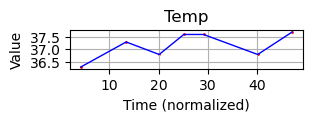

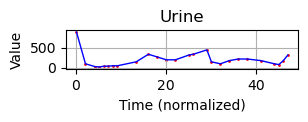

In [ ]:
#################################################################
# Play with visualization
################################################################

element = train_data_0[2]
time_steps = element[1]
data = element[2]
mask = element[3]
attribute_filtered_idx_features = np.where(attribute_filtered_idx)[0]
features =  attribute_filtered_idx_features
for i in features:
    feature_name = attr_names[i]
    plt.figure(figsize=(3, 0.5))
    # make a scatter plot
    plt.scatter(time_steps[mask[:, i] == 1], data[mask[:, i] == 1, i], color='red', s=1, label='Observed')
    # make a line plot for the whole time series but not plottting the zeros 
    plot_data = data[:, i][mask[:, i] == 1]
    plt.plot(time_steps[mask[:, i] == 1], plot_data, color='blue', linewidth=1, label='Full time series')
    plt.xlabel('Time (normalized)')
    plt.ylabel('Value')
    plt.title(f'{feature_name}')
    plt.grid()
    plt.show()